Please upload your heatmap CSV file...


Saving heatmap_data_processes_by_impact.csv to heatmap_data_processes_by_impact (1).csv
Processing file: heatmap_data_processes_by_impact (1).csv


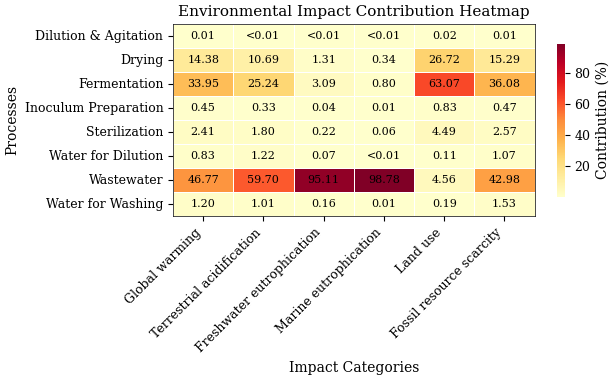

In [3]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload the CSV file
print("Please upload your heatmap CSV file...")
uploaded = files.upload()

# Step 2: Load the CSV file into a DataFrame
filename = next(iter(uploaded))
print(f"Processing file: {filename}")

# Load the CSV (adjust parameters if needed)
df = pd.read_csv(filename, index_col=0)

# Set custom style parameters
plt.rcParams.update({
    # Figure size and layout
    'figure.figsize': (6.5, 4.0),

    # Font settings
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,

    # Axes settings
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.linewidth': 0.5,

    # Grid settings
    'grid.linestyle': '--',
    'grid.alpha': 0.3,

    # Legend settings
    'legend.frameon': True,
    'legend.framealpha': 0.7,
    'legend.handlelength': 4.0,

    # Output settings
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
})

# Create figure
fig, ax = plt.subplots()

# Custom formatter function to display values less than 0.01 as "<0.01"
def custom_formatter(val):
    if val < 0.01 and val > 0:
        return "<0.01"
    else:
        return '{:.2f}'.format(val)

# Create the heatmap with custom formatter
heatmap = sns.heatmap(
    df,
    annot=True,                # Show values in cells
    fmt="",                    # Empty format to use custom formatter
    annot_kws={
        'size': 8,             # Font size for annotations
        'weight': 'normal',
        'family': 'serif',     # Match the serif font family
        'color': 'black'
    },
    cmap='YlOrRd',             # Yellow-Orange-Red color map
    linewidths=0.5,            # Cell border width
    cbar_kws={
        'label': 'Contribution (%)',
        'shrink': 0.8          # Slightly smaller colorbar
    },
    ax=ax
)

# Apply the custom formatter
for text in heatmap.texts:
    value = float(text.get_text())
    text.set_text(custom_formatter(value))

# Customize the plot appearance
ax.set_title('Environmental Impact Contribution Heatmap', fontsize=11)
ax.set_ylabel('Processes', fontsize=10)
ax.set_xlabel('Impact Categories', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines to match the style
for i in range(len(df.index) + 1):
    plt.axhline(y=i, color='white', lw=0.5)

for i in range(len(df.columns) + 1):
    plt.axvline(x=i, color='white', lw=0.5)

# Add a border around the heatmap
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)

# Adjust layout and display
plt.tight_layout()
plt.savefig('environmental_impact_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()